<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/Coupon_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coupon Recommendation**


## Problem Statement

This data was collected via a survey on the Ecom website Mechanical Turk.
The survey describes different driving scenarios including the user’s destination,
current time, weather, passenger, coupon attributes, user attributes,
and contextual attributes, and then asks the user whether he/she will accept the coupon or not

## AIM:

To build  a classfication model to classify whether "User" he/She will accept the coupon or not



In [ ]:
# Importing the necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Data Loading

coup_rec = pd.read_csv('/content/DS_DATA.csv')

In [ ]:
# Data Volume

coup_rec.shape

(12684, 25)

In [ ]:
# Printing the number of Rows and Columns

print('Number of Rows:', coup_rec.shape[0])
print('Number of Columns', coup_rec.shape[1])

Number of Rows: 12684
Number of Columns 25


In [ ]:
# Displaying the first five columns from the dataset

coup_rec.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
# Review the Structure of dataset

coup_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
# Displaying Column names
coup_rec.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')



It seems that the data has some few numberical datatypes and the rest are string objects, however all the data can be categorized as being categorical datatypes with a mix of binary and ordinal datatypes.


In [ ]:
coup_rec['temperature'].unique()

array([55, 80, 30])

In [ ]:
# Change temperature into a category as its an ordinal datatype

coup_rec['temperature']=coup_rec['temperature'].astype('category')

In [ ]:
# Summary of Descriptive Statistics

coup_rec.describe()

,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking for the missing values

coup_rec.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [ ]:
#Checking for the missing values Percentage wise

coup_rec.isnull().sum()/len(coup_rec)*100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000
has_children,0.000000




We can see that the total 6 attributes have missing values, from that 'car' feature has 99% of the missing value so we need to drop this feature.

Other features like 'bar', 'coffeehouse', 'carryaway', 'RestaurantLessThan20', and 'Restaurant20To50' have approx 1% of missing value, so we need to fill these missing values with some other value, for that we will use mode imputation.


In [ ]:
# Dropping 'car' Attribute from the dataset

coup_rec.drop(['car'], axis = 1 , inplace = True)

Lets iterate through the pandas table and get all the columns with empty or NaN values, and then for each column the code is going to find the largest variable count and fill the empty values with the corresponding variable with maximum count.

In [ ]:
# Looping to fill the missing values

for x in coup_rec.columns[coup_rec.isna().any()]:
    coup_rec = coup_rec.fillna({x: coup_rec[x].value_counts().idxmax()})



In [ ]:
# Change the object datatypes to Categorical datatypes

df_obj = coup_rec.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    coup_rec[col]=coup_rec[col].astype('category')

coup_rec.dtypes

,0
destination,category
passanger,category
weather,category
temperature,category
coupon,category
expiration,category
gender,category
age,category
maritalStatus,category
has_children,int64


In [ ]:
# Statistical Analysis

coup_rec.describe(include = 'all')

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684.000000,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,2,2,8,5,NaN,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,Coffee House,1d,Female,21,Married partner,NaN,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3996,7091,6511,2653,5100,NaN,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
coup_rec.select_dtypes('int64').nunique()

,0
has_children,2
toCoupon_GEQ5min,1
toCoupon_GEQ15min,2
toCoupon_GEQ25min,2
direction_same,2
direction_opp,2
Accept(Y/N?),2


From the decription above we can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column.

In [18]:
coup_rec.drop(columns=['toCoupon_GEQ5min'], inplace=True)

Here Target Variable is [''Accept(Y/N?)'']

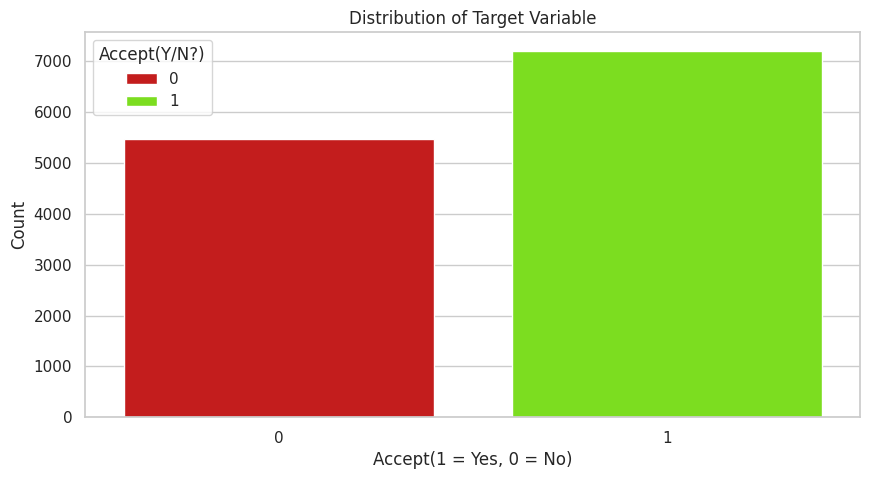

In [19]:
# Visualize the Distribution of targer variable ''Accept(Y/N?)'

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
colors = ["#DF0101","#7CFC00"]
sns.countplot(x = 'Accept(Y/N?)',data = coup_rec, palette = colors, hue='Accept(Y/N?)')

# Adding labels and title
plt.title('Distribution of Target Variable')
plt.xlabel('Accept(1 = Yes, 0 = No)')
plt.ylabel('Count')

#Show Plot
plt.show()

In [21]:
# Analysing the "Target  Variable " Values
coup_rec['Accept(Y/N?)'].unique()

array([1, 0])

In [22]:
coup_rec['Accept(Y/N?)'].nunique()

2

In [23]:
# To Visualize the class distributions


coup_rec['Accept(Y/N?)'].value_counts()

,count
Accept(Y/N?),
1,7210
0,5474


In [24]:
# Normalizing the Target Variable

coup_rec['Accept(Y/N?)'].value_counts(normalize= True)

,proportion
Accept(Y/N?),
1,0.568433
0,0.431567


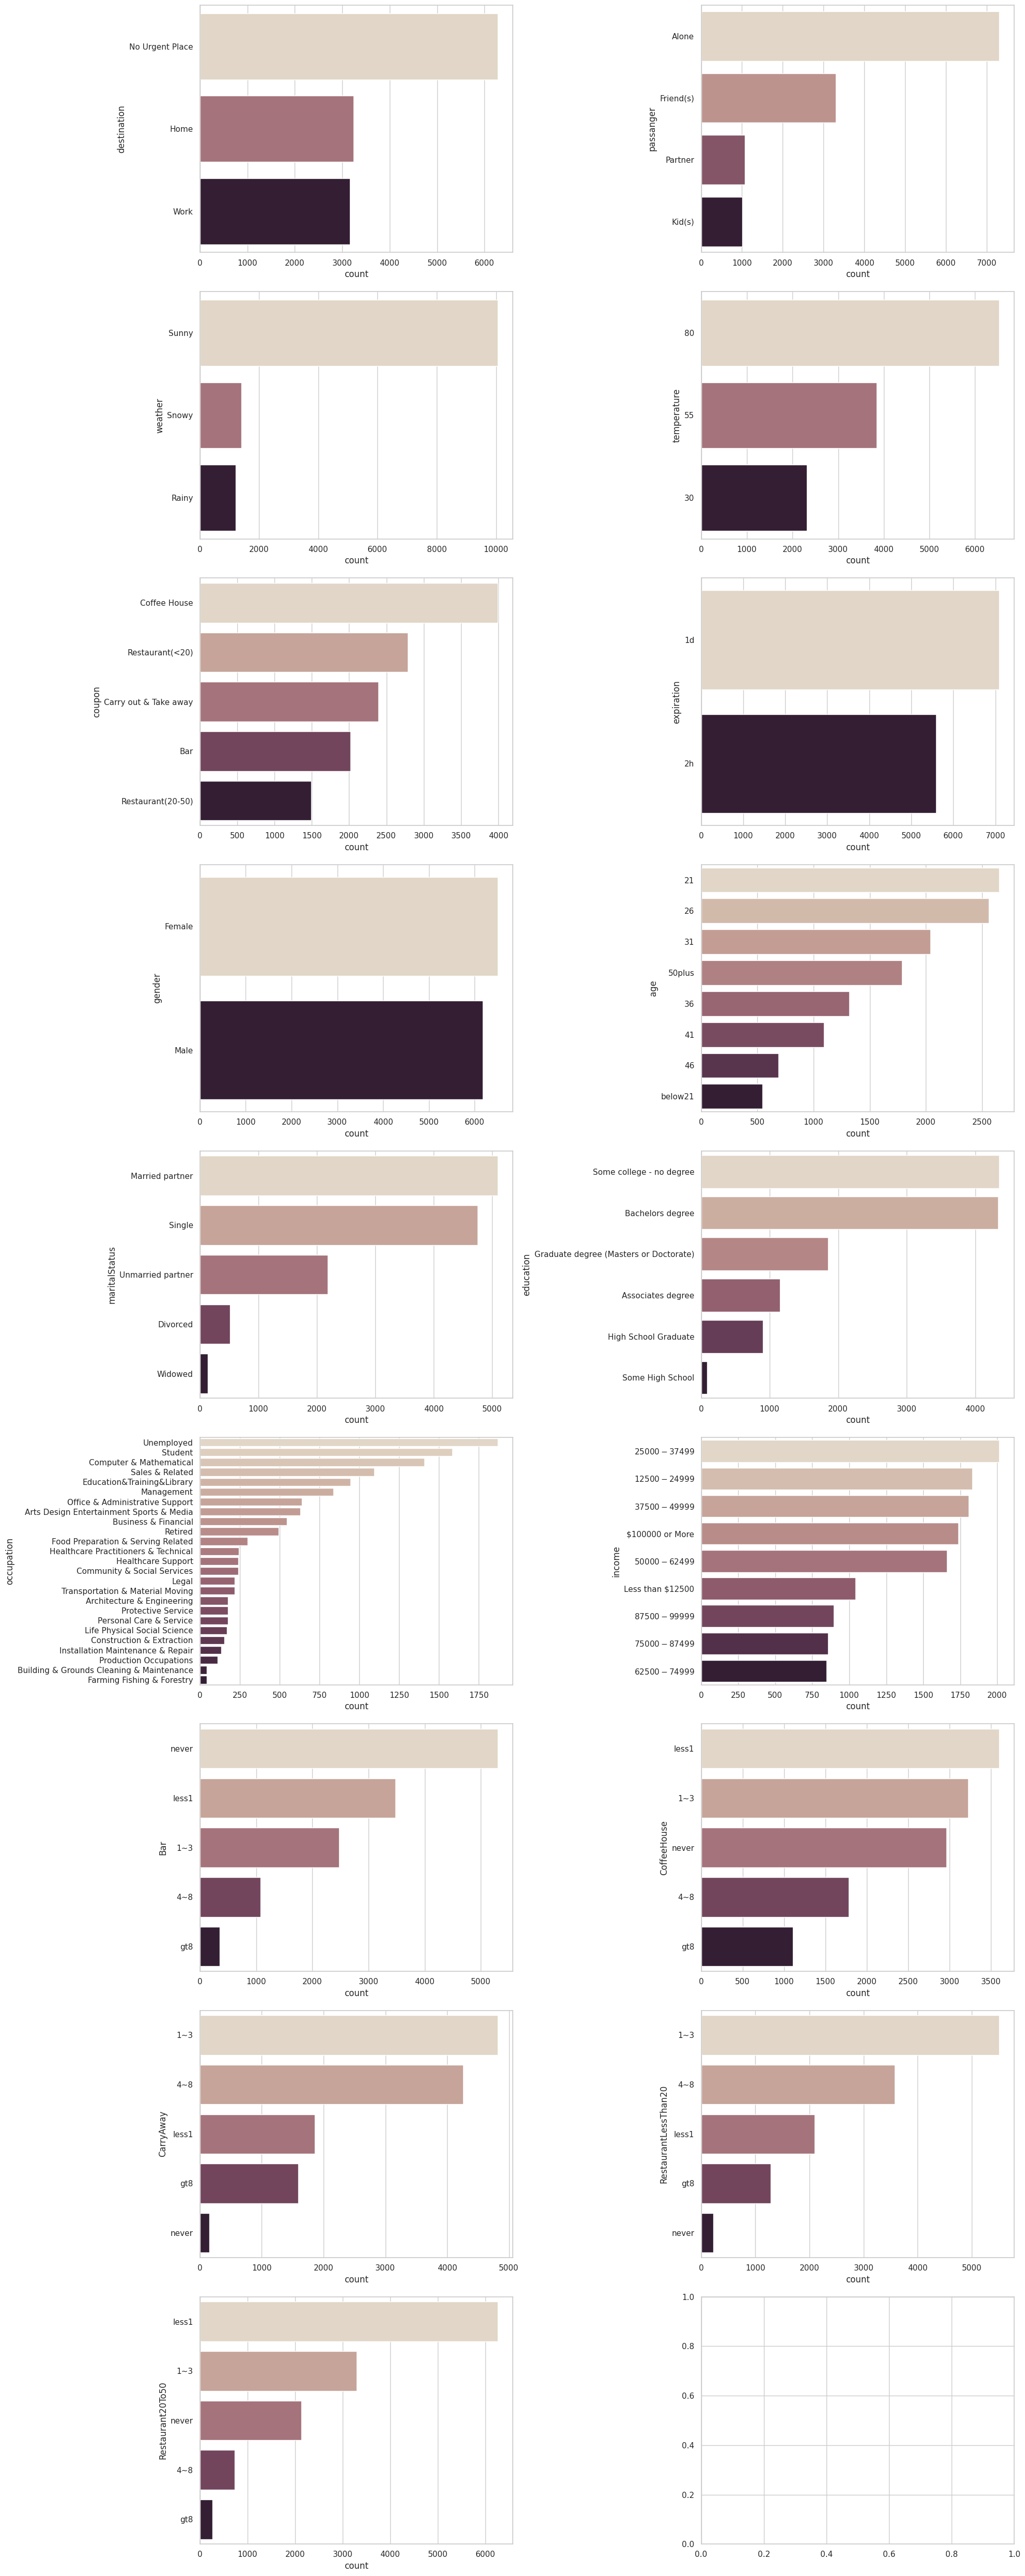

In [25]:
# Distribution Charts of all the Categorical  Data types

fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, coup_rec.select_dtypes(include = ['category']).columns):
    sns.countplot(y=col, data=coup_rec, ax=ax,
                  palette="ch:.25", order=coup_rec[col].value_counts().index);

plt.tight_layout()
plt.show()

Creating Feature vectors for our modeling by using the LabelEncoder and OneHotEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = coup_rec.select_dtypes(include=['category']).copy()
df_int = coup_rec.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    enc_results = enc.fit_transform(df_cat[[col]])
    df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    df_enc = pd.concat([df_enc,df0], axis=1)

df_final = pd.concat([df_enc, df_int], axis=1)

In [27]:
#Displaying the Data Frame
df_final

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(4~8,)","(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:

# Looking for the value Counts

#coup_rec['Restaurant20To50'].value_counts()

,count
Restaurant20To50,
less1,6077
1~3,3290
never,2136
4~8,728
gt8,264


In [ ]:
# Using Imputation method to fill the missing values

#coup_rec['Restaurant20To50'].fillna(coup_rec['Restaurant20To50'].mode()[0], inplace = True)

In [28]:
# Checking for the duplicates

coup_rec.duplicated().sum()

np.int64(291)

In [29]:
# Removing the duplicates

print("Shape of the Dataset : ", coup_rec.shape)
coup_rec.drop_duplicates(inplace = True)
print("Shape of the Dataset after removing duplicates : ", coup_rec.shape)

Shape of the Dataset :  (12684, 23)
Shape of the Dataset after removing duplicates :  (12393, 23)


In [30]:
# Correlation of Features

numeric_categorical_features = coup_rec.select_dtypes(include = ['int64']).columns
df_corr = coup_rec[numeric_categorical_features]
df_corr.corr()


,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
has_children,1.000000,0.078686,-0.011651,-0.032276,0.032276,-0.044889
toCoupon_GEQ15min,0.078686,1.000000,0.321919,-0.297284,0.297284,-0.086050
toCoupon_GEQ25min,-0.011651,0.321919,1.000000,-0.190759,0.190759,-0.107855
direction_same,-0.032276,-0.297284,-0.190759,1.000000,-1.000000,0.016356
direction_opp,0.032276,0.297284,0.190759,-1.000000,1.000000,-0.016356
Accept(Y/N?),-0.044889,-0.086050,-0.107855,0.016356,-0.016356,1.000000


1-Feature 'direction_same' is perfectly correlated with 'direction_opp', both have the same variance.

so, drop both 'direction_opp' feature.


In [31]:
# Dropping the ['direction_opp'] and ['toCoupon_GEQ5min']

coup_rec.drop(['direction_opp'], axis = 1, inplace = True)

DATA MODELING

In [32]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
#split data into training and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size=.3, random_state=42, shuffle=True, stratify=df_final['Accept(Y/N?)'])

In [35]:
#Creating the Dependent Feature Matrix
X_train = train_set.iloc[:, :-1].values
X_test = test_set.iloc[:, :-1].values

#Creating the Independent Vector
y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values

IMPLEMENTING MACHINE LEARNING ALGORITHM

LOGISTIC REGRESSION

In [36]:
# Logistic Regression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

#Predict the response for test dataset
y_pred_LR = LR.predict(X_test)

print(classification_report(y_test, y_pred_LR))



              precision    recall  f1-score   support

           0       0.65      0.55      0.59      1643
           1       0.69      0.78      0.73      2163

    accuracy                           0.68      3806
   macro avg       0.67      0.66      0.66      3806
weighted avg       0.67      0.68      0.67      3806



  DECISION TREE

In [37]:
DTC = DecisionTreeClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DTC = DTC.predict(X_test)

print(classification_report(y_test, y_pred_DTC))



              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1643
           1       0.71      0.72      0.72      2163

    accuracy                           0.68      3806
   macro avg       0.67      0.67      0.67      3806
weighted avg       0.68      0.68      0.68      3806



K-NEAREST NEIGHBORS

In [38]:
KNN = KNeighborsClassifier().fit(X_train, y_train)

#Predict the response for test dataset
y_pred_KNN = KNN.predict(X_test)

print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1643
           1       0.69      0.74      0.71      2163

    accuracy                           0.66      3806
   macro avg       0.65      0.65      0.65      3806
weighted avg       0.66      0.66      0.66      3806



GAUSSIAN NAIVE BAYES

In [39]:
GNB = GaussianNB().fit(X_train, y_train)

#Predict the response for test dataset
y_pred_GNB = GNB.predict(X_test)

print(classification_report(y_test, y_pred_GNB))



              precision    recall  f1-score   support

           0       0.54      0.63      0.58      1643
           1       0.68      0.60      0.64      2163

    accuracy                           0.61      3806
   macro avg       0.61      0.61      0.61      3806
weighted avg       0.62      0.61      0.61      3806



SUPPORT VECTOR MACHINE

In [40]:
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1).fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = SVM.predict(X_test)

print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      1643
           1       0.75      0.84      0.79      2163

    accuracy                           0.75      3806
   macro avg       0.75      0.73      0.74      3806
weighted avg       0.75      0.75      0.74      3806





For machine learning models, achieving a good prediction model is extremely crucial. It involves achieving a balance between underfitting and overfitting or ie. a trade-off between bias and variance.

When it comes to classification, the precision-recall trade-off is a fundamentally important metric to investigate.

Precision is the ratio between the True Positive and all Positives. For this problem it would be the measure of drivers that were correctly identified using a coupon out of all the drivers actually using it.

Recall is the measure of our model correctly identifying True Positives. Thus all the drivers who actually accepted a coupon, recall tells how many we correctly identified as accepting a coupon.


In [41]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm_SVM = confusion_matrix(y_test,y_pred_SVM)
pd.crosstab(y_test, y_pred_SVM, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,1034,609,1643
1,350,1813,2163
All,1384,2422,3806




A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.


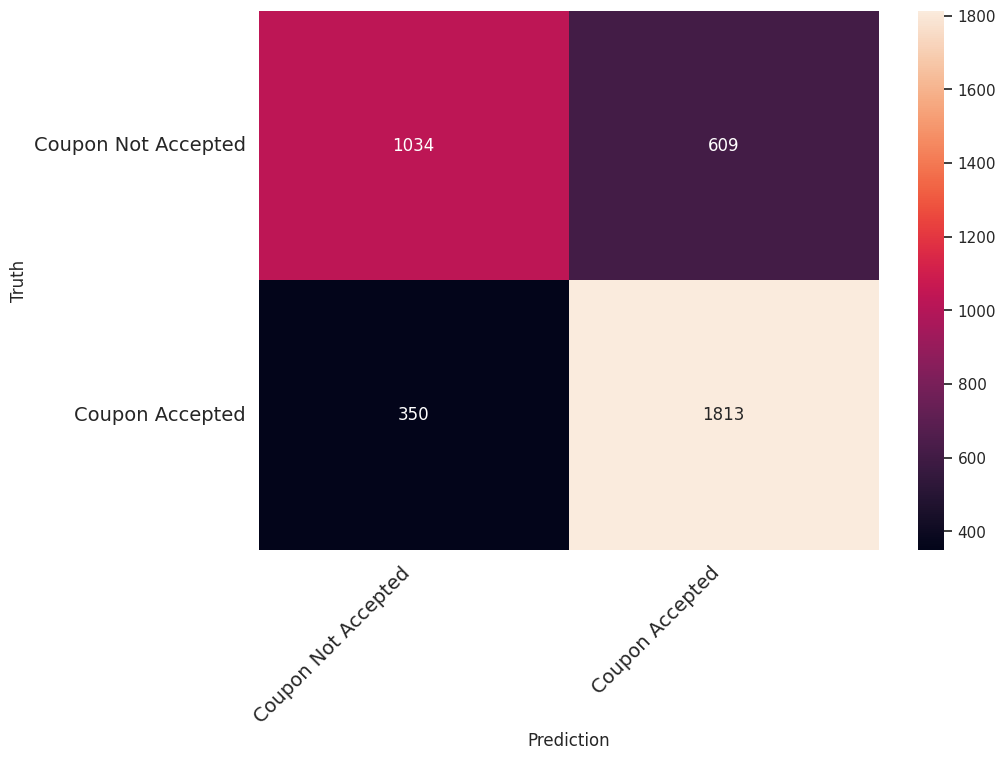

In [42]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm_SVM,["Coupon Not Accepted", "Coupon Accepted"])


ROC Curves(Receiver Operating Characteristic Curve)

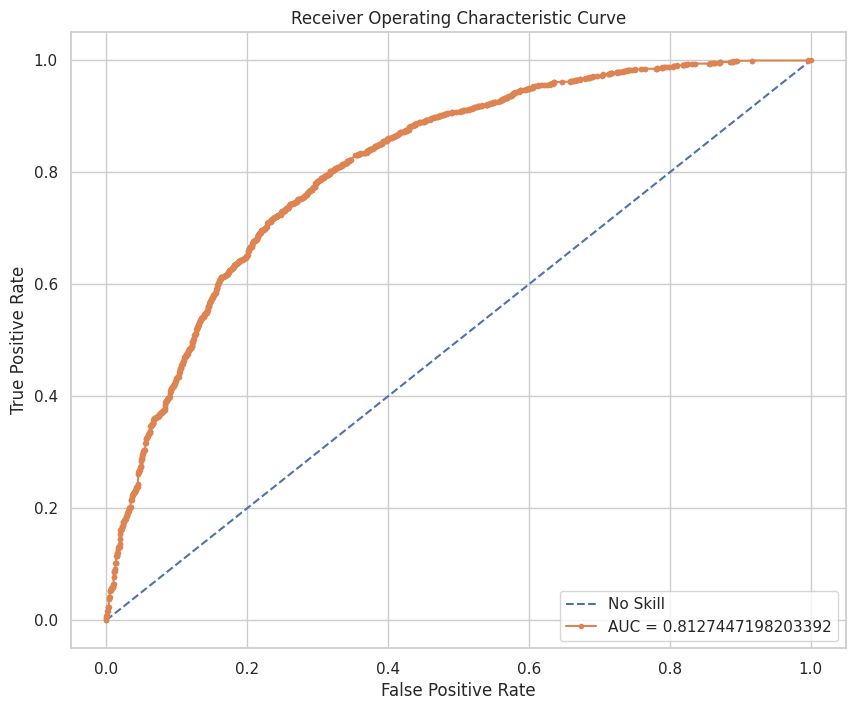

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_proba = SVM.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (10,8))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

Precision-Recall Curve(PRC)

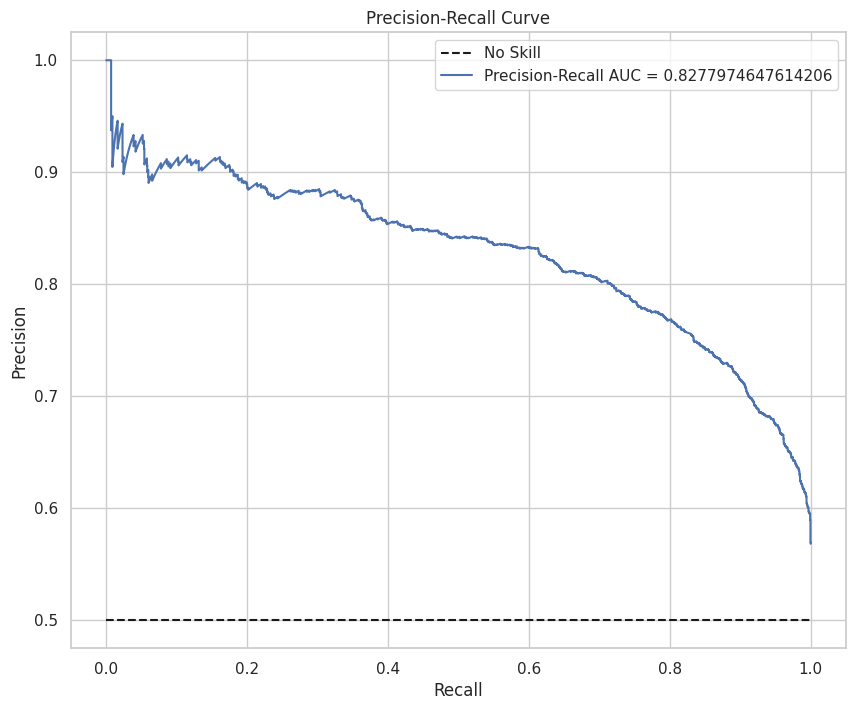

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--', label = 'No Skill')
prc_auc = auc(recall, precision)
plt.plot(recall, precision, label = 'Precision-Recall AUC = '+str(prc_auc))
plt.legend(loc=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



MODEL SELECTION

In [47]:
#Importing necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [51]:
# Create SVM pipeline (scaling + SVM)
pipe_svm = Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(random_state=42))])

In [49]:
# Define parameter grid for model selection

param_grid = {
    'svm__C': [0.1, 1, 10],          # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],# Try both kernels
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient
}

In [50]:
# Model selection using GridSearchCV
grid = GridSearchCV(pipe_svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [52]:
# Model summary
print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-validation Accuracy: 0.7431856363405659
Test Accuracy: 0.7362059905412507


SELECTING A MODEL

In [55]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

SAVING THE MODEL

In [56]:
# Save the model

# Importing necessary library

import joblib


In [57]:
joblib.dump(model,"Coupon_Recommendation.pk1")

['Coupon_Recommendation.pk1']

In [58]:
# Load the model

model = joblib.load("Coupon_Recommendation.pk1")